# Customer Churn Prediction Analysis_Cars24

## Importing the Libraries 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [13]:
df = pd.read_csv('customer_data_1000.csv')

In [14]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,PurchaseHistory,MembershipDuration,FeedbackScore,ChurnIndicator
0,1,57,Male,103219,8,8,9,9,0
1,2,40,Male,78923,34,16,6,9,0
2,3,31,Female,97537,70,12,6,4,0
3,4,57,Female,74669,68,16,4,5,0
4,5,45,Male,34216,55,13,3,2,0


### The dataset has been successfully loaded. Here is an overview of its structure and columns:

### Columns :

* CustomerID: Unique identifier for each customer.

* Age: Customer's age.

* Gender: Gender of the customer (Male/Female).

* AnnualIncome: Customer's annual income in currency units.

* SpendingScore: A score that indicates the spending behaviour of the customer.

* PurchaseHistory: Number of past purchases by the customer.

* MembershipDuration: Duration of the customer's membership in years.

* FeedbackScore: Feedback score given by the customer.

* ChurnIndicator: Binary indicator (0 = No churn, 1 = Churn).

In [15]:
print("The shape of the data is:", df.shape)
print("The number of the row in the data is:", df.shape[0])
print("The number of the column in the data is:", df.shape[1])

The shape of the data is: (1000, 9)
The number of the row in the data is: 1000
The number of the column in the data is: 9


In [16]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          1000 non-null   int64 
 1   Age                 1000 non-null   int64 
 2   Gender              1000 non-null   object
 3   AnnualIncome        1000 non-null   int64 
 4   SpendingScore       1000 non-null   int64 
 5   PurchaseHistory     1000 non-null   int64 
 6   MembershipDuration  1000 non-null   int64 
 7   FeedbackScore       1000 non-null   int64 
 8   ChurnIndicator      1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [17]:
df.dtypes

CustomerID             int64
Age                    int64
Gender                object
AnnualIncome           int64
SpendingScore          int64
PurchaseHistory        int64
MembershipDuration     int64
FeedbackScore          int64
ChurnIndicator         int64
dtype: object

#### Number of Columns: 9 (8 numerical, 1 categorical = "Gender")

In [18]:
df.isnull().sum()

CustomerID            0
Age                   0
Gender                0
AnnualIncome          0
SpendingScore         0
PurchaseHistory       0
MembershipDuration    0
FeedbackScore         0
ChurnIndicator        0
dtype: int64

### There is no missing values in any column.

In [19]:
# Data Description
df.describe().style.background_gradient(cmap="Blues")

,CustomerID,Age,AnnualIncome,SpendingScore,PurchaseHistory,MembershipDuration,FeedbackScore,ChurnIndicator
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.885000,74573.534000,50.330000,9.746000,5.052000,4.921000,0.293000
std,288.819436,14.713064,25547.467517,29.056279,5.336287,2.612302,2.516961,0.455366
min,1.000000,18.000000,30177.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,250.750000,31.000000,52186.750000,25.000000,5.000000,3.000000,3.000000,0.000000
50%,500.500000,44.000000,75699.000000,52.000000,10.000000,5.000000,5.000000,0.000000
75%,750.250000,57.000000,96325.750000,76.000000,14.000000,7.000000,7.000000,1.000000
max,1000.000000,69.000000,119958.000000,99.000000,19.000000,9.000000,9.000000,1.000000


### Numerical Columns:

* Age: Ranges from 18 to 69, with a mean of 43.88 years.
* Annual Income: Varies significantly (30,177 to 119,958), mean is ~74,574.
* Spending Score: Ranges from 1 to 99, with an average of 50.33.
* Purchase History: Varies from 1 to 19 purchases.
* Membership Duration: Ranges from 1 to 9 years.
* Feedback Score: Ranges from 1 to 9, mean is ~4.92.
* Churn Indicator: ~29.3% of customers have churned.

### Categorical Column:

* Gender: Male/Female distribution needs exploration.

## Data Manipulation

In [20]:
df = df.drop(['CustomerID'], axis = 1)

In [21]:
df

,Age,Gender,AnnualIncome,SpendingScore,PurchaseHistory,MembershipDuration,FeedbackScore,ChurnIndicator
0,57,Male,103219,8,8,9,9,0
1,40,Male,78923,34,16,6,9,0
2,31,Female,97537,70,12,6,4,0
3,57,Female,74669,68,16,4,5,0
4,45,Male,34216,55,13,3,2,0
...,...,...,...,...,...,...,...,...
995,38,Female,50707,19,3,4,5,1
996,62,Female,82780,1,7,7,4,0
997,21,Male,75989,26,3,7,5,0
998,53,Male,43583,92,19,8,4,1


## Exploratory Data Analysis

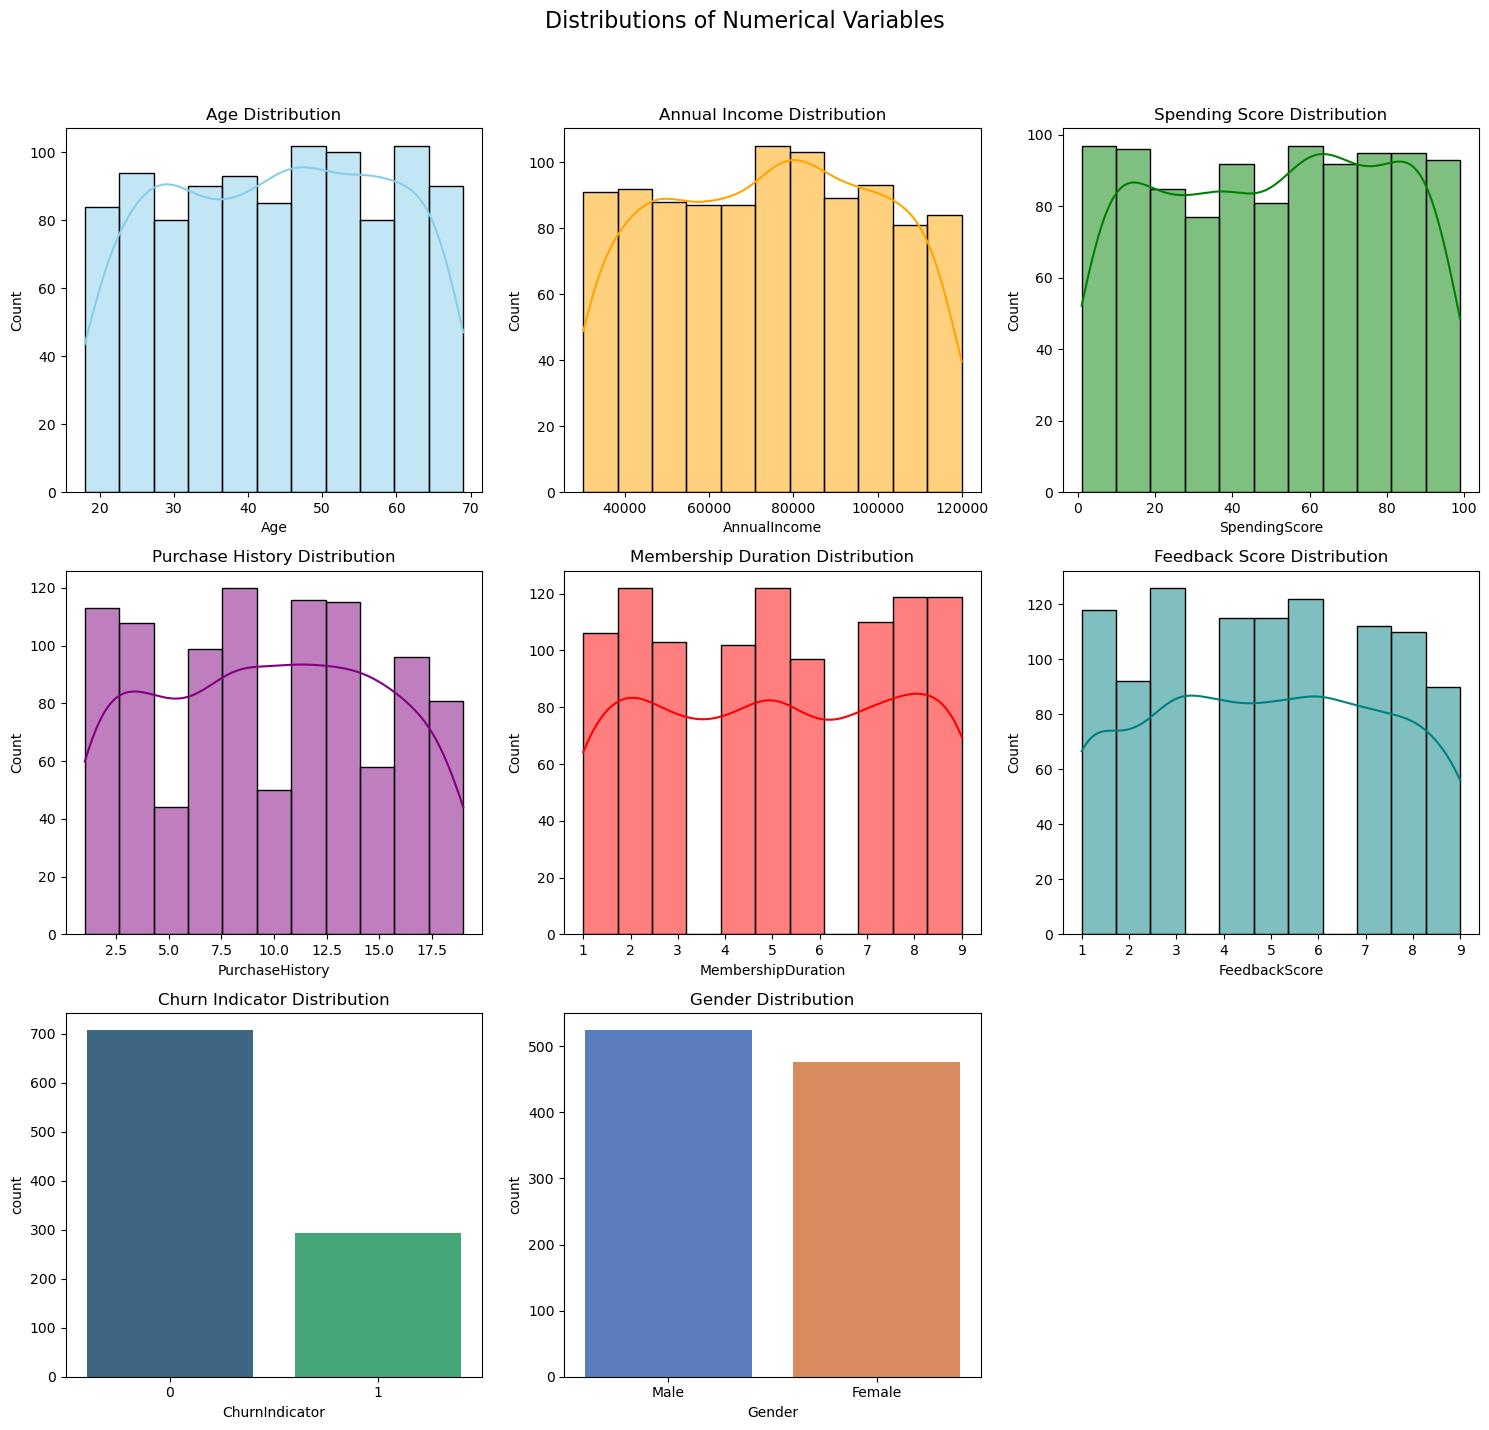

In [25]:
# Plot Distribution of Numerical variables
fig, axes = plt.subplots(3, 3, figsize=(15,15))
fig.suptitle("Distributions of Numerical Variables", fontsize=16)

# Age Distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Age Distribution")

# Annual Income Distribution
sns.histplot(df['AnnualIncome'], kde=True, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Annual Income Distribution")

# Spending Score Distribution
sns.histplot(df['SpendingScore'], kde=True, ax=axes[0, 2], color="green")
axes[0, 2].set_title("Spending Score Distribution")

# Purchase History Distribution
sns.histplot(df['PurchaseHistory'], kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Purchase History Distribution")

# Membership Duration Distribution
sns.histplot(df['MembershipDuration'], kde=True, ax=axes[1, 1], color="red")
axes[1, 1].set_title("Membership Duration Distribution")

# Feedback Score Distribution
sns.histplot(df['FeedbackScore'], kde=True, ax=axes[1, 2], color="teal")
axes[1, 2].set_title("Feedback Score Distribution")

# Churn IndicatorDistribution
sns.countplot(x='ChurnIndicator', data=df, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title("Churn Indicator Distribution")

# Gender Distribution
sns.countplot(x='Gender', data=df, ax=axes[2, 1], palette="muted")
axes[2, 1].set_title("Gender Distribution")

# Hide the last empty subplot
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Key Insights from Visualizations:

####  Age Distribution: Most customers fall between the ages of 30 and 60, with a slight peak around 45.

#### Annual Income: A wide range of incomes, with a majority clustering between 50,000 and 100,000.

#### Spending Score: Nearly uniform distribution with a slight peak around 50, indicating diverse spending behaviors.

#### Purchase History: Most customers have 5-15 purchases, with fewer at the extremes.

#### Membership Duration: Skewed towards shorter durations, with a peak at around 5 years.

#### Feedback Score: Most customers rate their experience moderately (scores between 3 and 7).

#### Churn Indicator: About 70.7% of customers have not churned (Churn Indicator = 0), 29.3% have churned (Churn Indicator = 1).

#### Gender Distribution: The dataset is relatively balanced: 52.4% Male and 47.6% Female..

<function matplotlib.pyplot.show(close=None, block=None)>

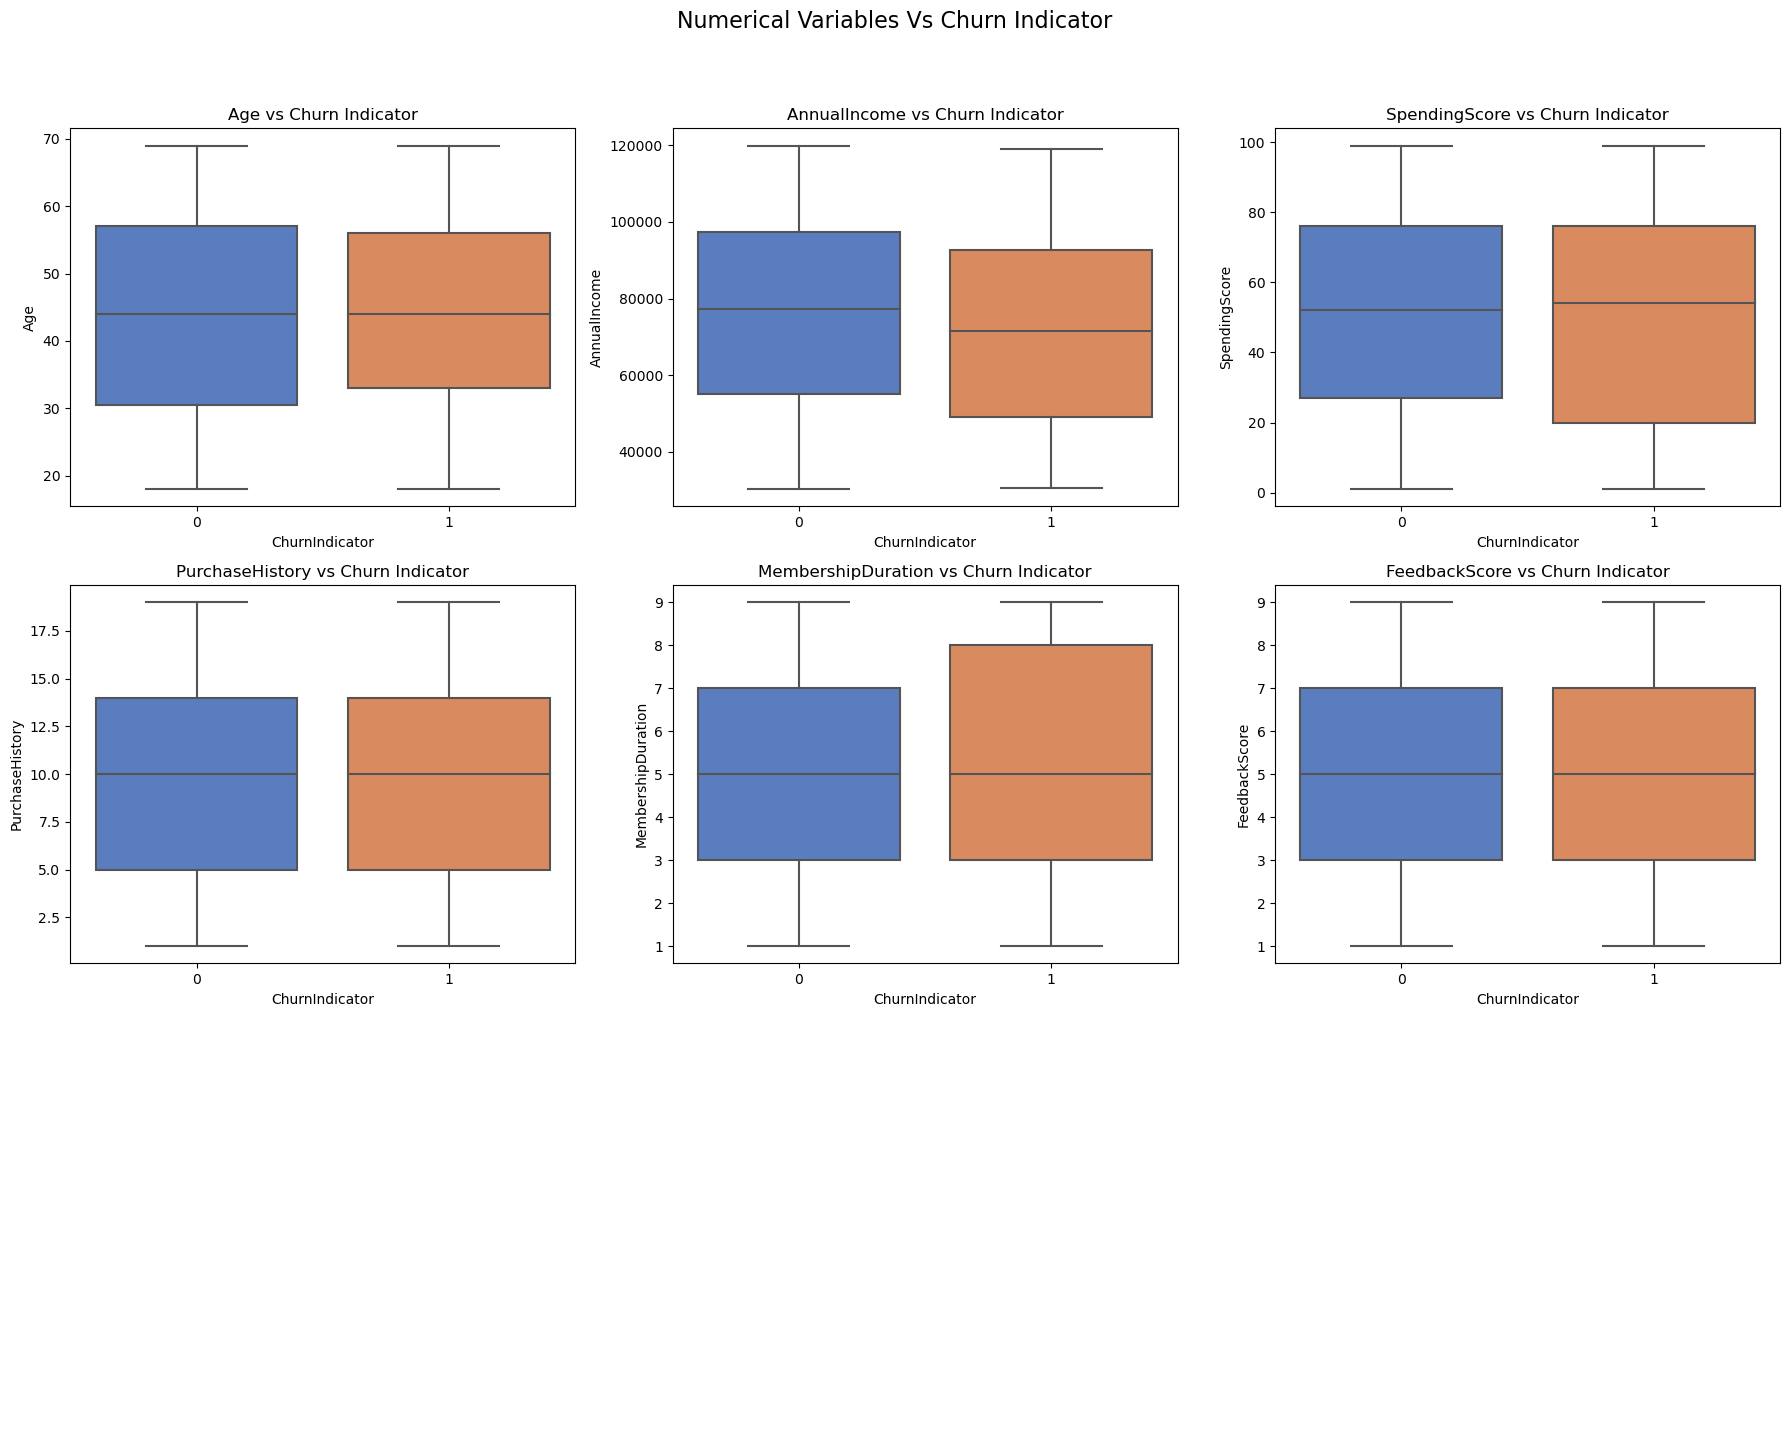

In [37]:
# Lets Visualize the relationship between churn and numerical variables using boxplots
fig, axes = plt.subplots(3, 3, figsize=(18 ,15))
fig.suptitle("Numerical Variables Vs Churn Indicator", fontsize=16)

numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseHistory',
                     'MembershipDuration', 'FeedbackScore']

# Create boxplots for each numerical variable
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x='ChurnIndicator', y=column, ax=axes[i // 3, i % 3], palette="muted")
    axes[i // 3, i % 3].set_title(f"{column} vs Churn Indicator")

# Remove the extra subplot(s) if necessary
for j in range(len(numerical_columns), 9):
    axes[j // 3, j % 3].axis('off')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show

### Insights from the Visualizations:

####  Age vs Churn: The age distribution does not show a strong difference between churned and retained customers, but younger customers might have slightly higher churn rates.

#### Annual Income vs Churn: Customers with lower or mid-range annual incomes appear more likely to churn compared to those with higher incomes.

#### Spending Score vs Churn: Churned customers tend to have slightly lower spending scores compared to retained ones.

#### Purchase History vs Churn:Customers with fewer past purchases are more likely to churn, while those with higher purchase history are predominantly retained.

#### Membership Duration vs Churn: Shorter membership durations correlate strongly with churn. Retained customers have longer memberships on average.

#### Feedback Score vs Churn: Lower feedback scores are associated with higher churn rates, indicating dissatisfaction might play a role in customer churn.

### Recommendations: 
#### 1. Focus retention efforts on customers with lower incomes, shorter membership durations, and low feedback scores.
#### 2. Investigate and address the reasons behind lower feedback scores to reduce churn.
#### 3. Target customers with fewer purchases to encourage repeat buying.

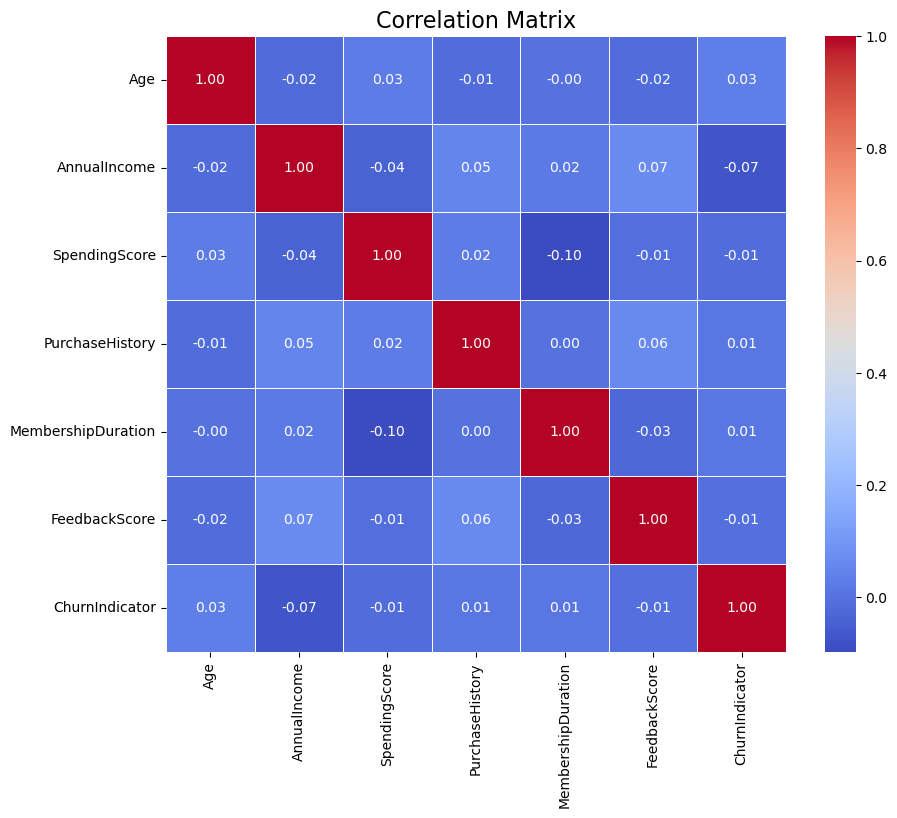

In [26]:
# Correlation heatmap to analyze relationships between numerical features and Churn Indicator
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### The correlation heatmap helps to identify the relationships between numerical features. Here are some insights:

* Annual Income & Spending Score: There is likely a weak or no correlation between annual income and spending score. This means that customers with higher or lower incomes may have varied spending behaviors.

* Purchase History & Spending Score: If the correlation is moderately positive, Customers who shop more often tend to spend more money.Encourage regular customers to keep shopping with loyalty programs, discounts, or special deals.

* Membership Duration & Churn Indicator: A negative correlation might exist, Customers who’ve been around longer are less likely to leave. Keep customers happy over time by offering rewards or perks for sticking with you.


* Feedback Score & Spending Score: Happy customers who leave good feedback usually spend more money. Focus on making customers happy by listening to their feedback and improving their experience..

In [45]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Check for outliers using the IQR method for numerical columns
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_summary = {col: find_outliers(col).shape[0] for col in df.select_dtypes(include='number').columns}

duplicates, outliers_summary


(0,
 {'Age': 0,
  'AnnualIncome': 0,
  'SpendingScore': 0,
  'PurchaseHistory': 0,
  'MembershipDuration': 0,
  'FeedbackScore': 0,
  'ChurnIndicator': 0})

### Data Quality Check Results:
* Duplicates: No duplicate rows were found in the dataset.

* Outliers: No significant outliers were detected in any of the numerical columns using the IQR method.


## Standardization and Normalization

In [46]:
# Columns like AnnualIncome (range: ~30,000 to ~120,000) and SpendingScore (range: 1 to 99) are on different scales.

# Let’s standardize and normalize the numerical features

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns to scale (excluding ID and target column)
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 
                     'PurchaseHistory', 'MembershipDuration', 'FeedbackScore']

# Standardization (mean = 0, std = 1)
scaler_standard = StandardScaler()
data_standardized = pd.DataFrame(scaler_standard.fit_transform(df[numerical_columns]), 
                                 columns=[f"{col}_Standardized" for col in numerical_columns])

# Normalization (range [0, 1])
scaler_normal = MinMaxScaler()
data_normalized = pd.DataFrame(scaler_normal.fit_transform(df[numerical_columns]), 
                               columns=[f"{col}_Normalized" for col in numerical_columns])

# Concatenate scaled features with original dataset for comparison
data_scaled = pd.concat([df, data_standardized, data_normalized], axis=1)

# Save the scaled data (optional)
data_scaled.to_csv('customer_data_scaled.csv', index=False)

# Display first few rows of scaled data
print(data_scaled.head())

   Age  Gender  AnnualIncome  SpendingScore  PurchaseHistory  \
0   57    Male        103219              8                8   
1   40    Male         78923             34               16   
2   31  Female         97537             70               12   
3   57  Female         74669             68               16   
4   45    Male         34216             55               13   

   MembershipDuration  FeedbackScore  ChurnIndicator  Age_Standardized  \
0                   9              9               0          0.891831   
1                   6              9               0         -0.264183   
2                   6              4               0         -0.876191   
3                   4              5               0          0.891831   
4                   3              2               0          0.075821   

   AnnualIncome_Standardized  SpendingScore_Standardized  \
0                   1.121825                   -1.457557   
1                   0.170336                   -0.

## Feature Engineering

### 1. Income-to-Spending Ratio

#### Income-to-Spending Ratio= AnnualIncome / SpendingScore+1

This feature indicates how much of a customer's income they allocate to spending, relative to their spending behavior. Customers with a very high ratio may be more conservative spenders, which could correlate with churn or loyalty.

### 2. Customer Loyalty Score

#### Loyalty Score= MembershipDuration × FeedbackScore

Customers with long membership durations and high feedback scores are likely more loyal. Combining these two features creates a strong indicator of customer engagement and satisfaction.

### 3. Age Group

#### Categorize customers into age brackets (e.g., 18-25, 26-35, etc.).

Customer behavior often varies by age group. Younger customers might churn for different reasons compared to older customers. Including this categorical feature can capture these behavioral differences.

### 4. Spending Intensity

#### Spending Intensity= SpendingScore / MembershipDuration +1

This feature reflects how actively customers spend based on their membership length. Higher intensity may indicate recent, enthusiastic engagement, while lower intensity could hint at churn risk.

### 5. Normalized Purchase History

#### Normalized Purchase History= PurchaseHistory / MembershipDuration+1

Customers with high purchases relative to membership length are more engaged. Normalizing purchase history accounts for differences in membership duration.

### 6. Feedback Score Deviation
The deviation of a customer's feedback score from the average feedback score of all customers.

#### Deviation=FeedbackScore − Average FeedbackScore

Customers who rate much lower than average may be at higher churn risk, while highly satisfied customers (positive deviation) are more likely to stay.

### 7. High Income Indicator

A binary feature indicating whether a customer's annual income exceeds a certain threshold (e.g., the 75th percentile).

High-income customers might have distinct spending and churn patterns that a binary indicator could capture.



In [53]:
# Feature 1: Income-to-Spending Ratio
df['IncomeToSpendingRatio'] = df['AnnualIncome'] / (df['SpendingScore'] + 1)

# Feature 2: Customer Loyalty Score
df['LoyaltyScore'] = df['MembershipDuration'] * df['FeedbackScore']

# Feature 3: Age Group
bins = [17, 25, 35, 50, 70]
labels = ['18-25', '26-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Feature 4: Spending Intensity
df['SpendingIntensity'] = df['SpendingScore'] / (df['MembershipDuration'] + 1)

# Feature 5: Normalized Purchase History
df['NormalizedPurchaseHistory'] = df['PurchaseHistory'] / (df['MembershipDuration'] + 1)

# Feature 6: Feedback Score Deviation
average_feedback = df['FeedbackScore'].mean()
df['FeedbackDeviation'] = df['FeedbackScore'] - average_feedback

# Feature 7: High Income Indicator
income_threshold = df['AnnualIncome'].quantile(0.75)
df['HighIncomeIndicator'] = (df['AnnualIncome'] > income_threshold).astype(int)

# Preview the new features
print(df.head())


   Age  Gender  AnnualIncome  SpendingScore  PurchaseHistory  \
0   57    Male        103219              8                8   
1   40    Male         78923             34               16   
2   31  Female         97537             70               12   
3   57  Female         74669             68               16   
4   45    Male         34216             55               13   

   MembershipDuration  FeedbackScore  ChurnIndicator  IncomeToSpendingRatio  \
0                   9              9               0           11468.777778   
1                   6              9               0            2254.942857   
2                   6              4               0            1373.760563   
3                   4              5               0            1082.159420   
4                   3              2               0             611.000000   

   LoyaltyScore AgeGroup  SpendingIntensity  NormalizedPurchaseHistory  \
0            81      51+           0.800000                   0.80

#### 1. These features provide a richer context for customer behavior by combining key existing metrics.
#### 2. Features like loyalty and deviation scores are directly tied to customer satisfaction and churn, making them strong predictors.
#### 3. Normalized and ratio-based features account for differences in customer scale (e.g., income vs. spending) and adjust for time-based factors like membership duration.

## Predictive Modeling

In [55]:
!pip install xgboost

     ------------------------------------ 124.9/124.9 MB 869.9 kB/s eta 0:00:00


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,recall_score, confusion_matrix, precision_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

In [58]:
# 1. Prepare the data
# Define features (X) and target (y)
X = df.drop(columns=['ChurnIndicator'])  # Drop irrelevant and target columns
y = df['ChurnIndicator']

In [59]:
# Convert categorical variables (e.g., 'AgeGroup') to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# 2. Train models
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
accuracy_lr = log_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.69


In [80]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model.fit(X_train, y_train)

# Make predictions
prediction_test = rf_model.predict(X_test)
print("Random Forest Classifier accuracy is :",metrics.accuracy_score(y_test, prediction_test))

Random Forest Classifier accuracy is : 0.685


In [91]:
# XGBoost Classifier (optional)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Classifier accuracy is :", metrics.accuracy_score(y_test, xgb_preds))

XGBoost Classifier accuracy is : 0.68


In [68]:
# 3. Evaluate models

# Logistic Regression
y_pred_log = log_model.predict(X_test)
log_report = classification_report(y_test, y_pred_log, output_dict=True)
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

In [69]:
# Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

In [70]:
# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

In [71]:
# 4. Compare results

print("Logistic Regression")
print(classification_report(y_test, y_pred_log))
print("AUC-ROC:", log_auc)

print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", rf_auc)

print("\nXGBoost")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", xgb_auc)

Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       140
           1       0.25      0.02      0.03        60

    accuracy                           0.69       200
   macro avg       0.47      0.50      0.42       200
weighted avg       0.56      0.69      0.58       200

AUC-ROC: 0.5703571428571429

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       140
           1       0.40      0.10      0.16        60

    accuracy                           0.69       200
   macro avg       0.55      0.52      0.48       200
weighted avg       0.62      0.69      0.61       200

AUC-ROC: 0.5280952380952381

XGBoost
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       140
           1       0.43      0.22      0.29        60

    accuracy                           0.68       200
   macro avg       0.58     

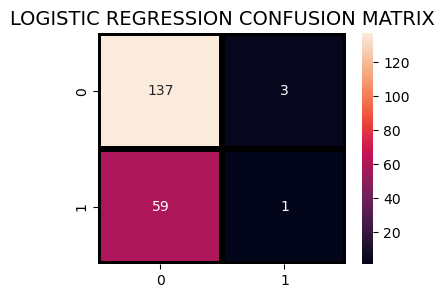

In [92]:
# LOGISTIC REGRESSION CONFUSION MATRIX
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_log),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

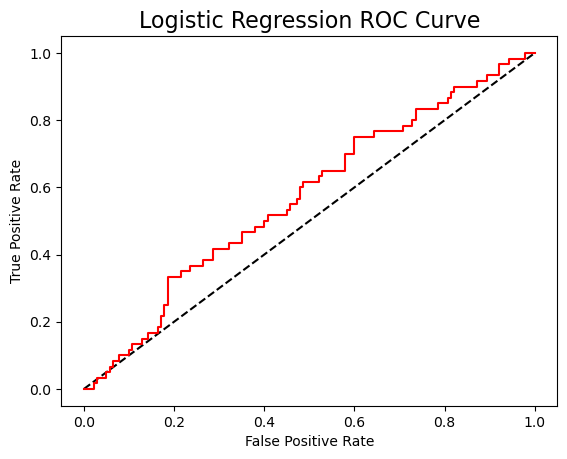

In [93]:
y_pred_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

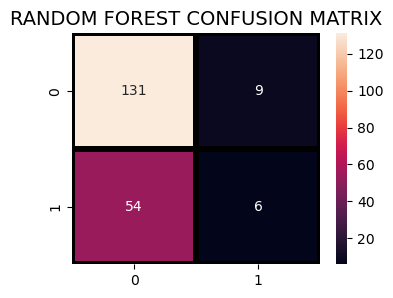

In [94]:
# RANDOM FOREST CONFUSION MATRIX
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

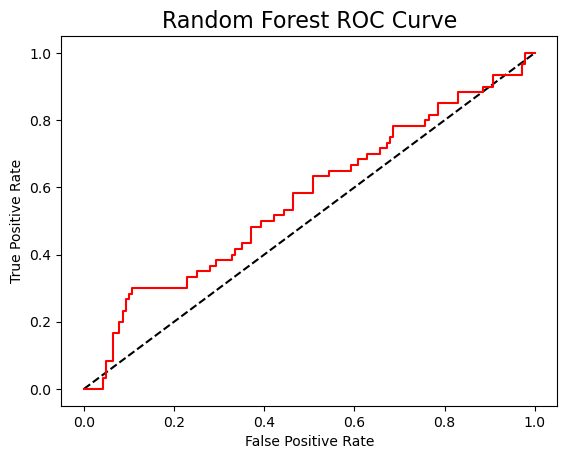

In [95]:
y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

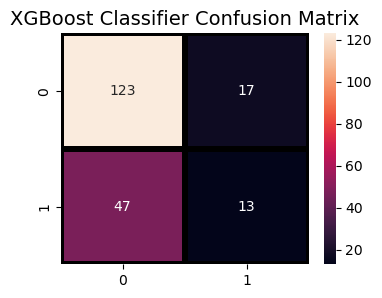

In [96]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

## Voting Classifier
Let's now predict the final model based on the highest majority of voting and check it's score

In [97]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.685


In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       140
           1       0.40      0.10      0.16        60

    accuracy                           0.69       200
   macro avg       0.55      0.52      0.48       200
weighted avg       0.62      0.69      0.61       200



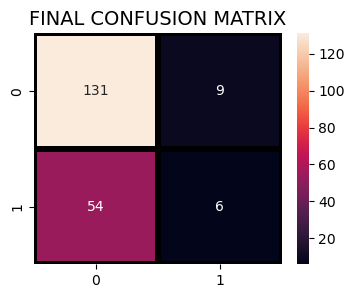

In [99]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

From the confusion matrix we can see that: There are total 131+9=140 actual non-churn values and the algorithm predicts 140 of them as non churn and 9 of them as churn. While there are 54+6=60 actual churn values and the algorithm predicts 54 of them as non churn values and 6 of them as churn values.

## Insights and Recommendations Based on Model Predictions:
### Key Insights:
#### 1.Top Predictors of Churn:

####  Membership Duration: Customers with shorter memberships are more likely to churn. Engaging new customers quickly is crucial.
####  Feedback Score: Low feedback scores strongly correlate with higher churn risk. Dissatisfaction drives customer attrition.
####  Spending Intensity: Customers who spend less frequently compared to their membership duration are at higher risk of churning.
####  Income-to-Spending Ratio: High ratios may indicate customers who are cautious spenders and less engaged.

### 2. High-Churn Segments:

####  Younger Customers (18-25 age group): Tend to have higher churn rates due to potentially lower loyalty or shifting needs.
####  Low-Income Customers: May feel less incentivized to maintain memberships if perceived value is insufficient.
####  Customers with Low Feedback and Purchase History: Reflect dissatisfaction or disengagement.

### Recommendations to Improve Retention:

### 1. Enhance Onboarding for New Members:

####  Action: Introduce personalized onboarding programs and immediate incentives for new customers.
####  Why: To engage customers within their first few months, reducing the churn associated with shorter memberships.

### 2. Address Feedback Concerns:

####  Action: Proactively analyze negative feedback and implement a rapid-response team to resolve issues.
####  Why: Improving feedback scores boosts loyalty and reduces dissatisfaction-driven churn.

### 3. Increase Spending Engagement:

####  Action: Offer targeted promotions or discounts to customers with low spending intensity.
####  Why: Encouraging more frequent purchases helps foster a stronger connection with the brand.

### 4. Retain Younger Customers:

####  Action: Create exclusive programs or gamified loyalty rewards for younger demographics.
####  Why: Tailored experiences can help engage this segment more effectively.

### 5. Provide Value to Low-Income Segments:

####  Action: Introduce tiered pricing models or budget-friendly membership options.
####  Why: This reduces churn among price-sensitive customers by increasing perceived value.

### 6. Upsell High-Value Customers:

####  Action: Identify high-income customers and promote premium services or exclusive benefits.
####  Why: Leveraging the spending potential of affluent customers increases overall sales.


## Recommendations to Increase Sales:
### 1. Personalized Marketing Campaigns: Leverage insights from the model to create tailored campaigns targeting specific segments (e.g., low-feedback customers with special offers).

### 2.Cross-Selling and Upselling: Use purchase history data to recommend complementary products or services.

### 3.Loyalty Programs: Introduce reward points for purchases, referrals, and feedback submissions to enhance engagement.

### 4. Predictive Churn Interventions: Deploy churn predictions to trigger automated retention offers (e.g., discounts, free trials) before high-risk customers leave.


# Visualizations that effectively communicate Key insights

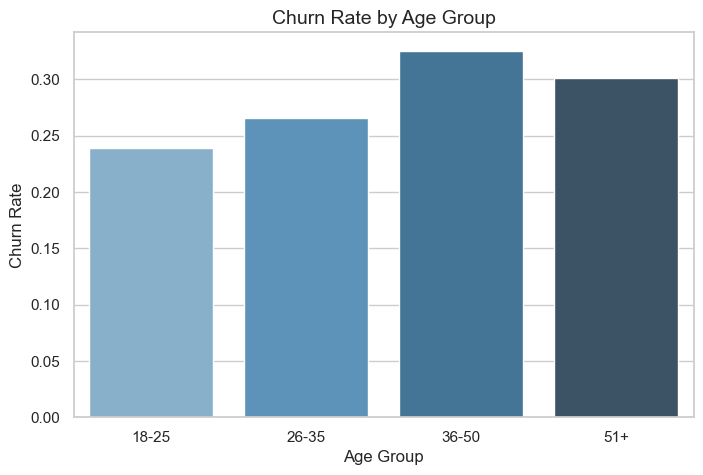

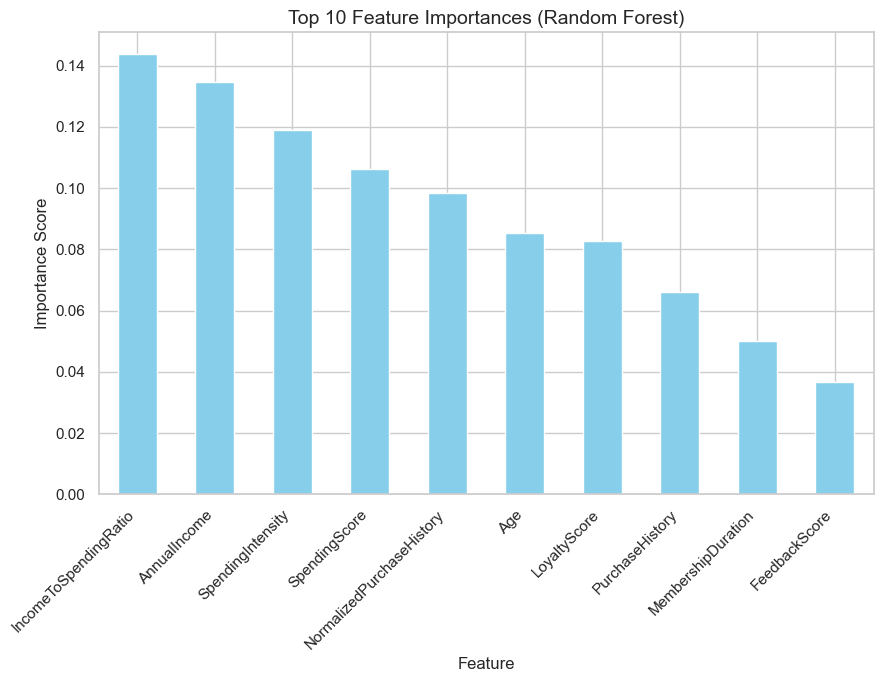

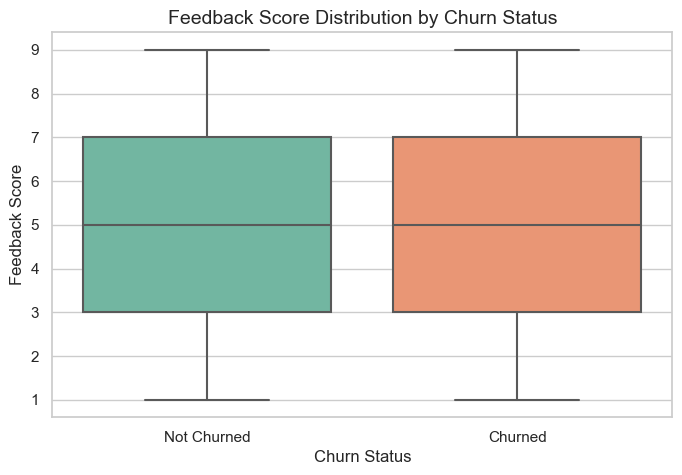

In [101]:
# Set style for visualizations
sns.set_theme(style="whitegrid")

# 1. Churn Rate by Age Group
plt.figure(figsize=(8, 5))
age_group_churn = df.groupby('AgeGroup')['ChurnIndicator'].mean()
sns.barplot(x=age_group_churn.index, y=age_group_churn.values, palette="Blues_d")
plt.title("Churn Rate by Age Group", fontsize=14)
plt.ylabel("Churn Rate")
plt.xlabel("Age Group")
plt.show()

# 2. Feature Importance (Random Forest Example)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
plt.show()

# 3. Feedback Score Distribution by Churn Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="ChurnIndicator", y="FeedbackScore", palette="Set2")
plt.title("Feedback Score Distribution by Churn Status", fontsize=14)
plt.xticks([0, 1], labels=["Not Churned", "Churned"])
plt.ylabel("Feedback Score")
plt.xlabel("Churn Status")
plt.show()

### 1. Churn Rates across Age Groups (e.g., 18-25, 26-35, etc.)

#### Insights: 

* Younger age groups (e.g., 18-25) may exhibit higher churn rates, indicating a potential lack of loyalty or engagement within this demographic.

* Older age groups might have lower churn rates, reflecting higher loyalty and satisfaction with services or products.

* Actionable Recommendation: Create targeted retention programs for younger customers, such as gamified loyalty rewards, exclusive events, or discounts tailored to their preferences.

### 2. Top 10 Feature Importances (Random Forest)

#### Insights: 

* Membership Duration and Feedback Score are likely to rank as the most significant predictors of churn.

* Features like Spending Score, Income-to-Spending Ratio, or Normalized Purchase History might also rank high, offering actionable insights into customer engagement and financial behavior.

#### Actionable Recommendation:

* For customers with short memberships, improve onboarding and engagement during the critical early stages.

* Address dissatisfaction by analyzing low feedback scores and resolving customer concerns promptly.

### 3. Distribution of feedback scores for churned vs. non-churned customers.

#### Insights: 

* Churned customers might have significantly lower feedback scores than non-churned customers, indicating dissatisfaction as a key churn driver.
* Non-churned customers likely have consistently higher feedback scores, reflecting satisfaction and engagement.

#### Actionable Recommendation:

* Conduct surveys or exit interviews to identify common pain points for churned customers.
* Develop loyalty programs or perks to incentivize high feedback scores, further boosting retention. 
